# giá cổ phiếu là gì  ?
Cổ phiếu là chứng minh quyền sở hữu của cổ đông đối với cty cổ phần 

# time seri là gì  ? 
<p>Dữ liệu chuỗi thời gian (Time series data) hiểu một cách đơn giản thì nó là dữ liệu theo thời gian </p>

# Mô tả dữ liệu 

### Thông tin mã chứng khoán
+ FPT : Cty CP FPT ( Công nghệ)
+ MSN : Cty CP Tập đoàn MaSan (QL vốn đầu tư và tài sản)
+ PNJ : Cty CP Vàng bạc đá quý ( vàng, bạc, đá quý)
+ VIC : Tập đoàn Vingroup( BDS,Oto)

### Các trường dữ liệu
* Ticker : Tên của giá cổ phiếu
* Date/Time : Thời gian chốt dl giá cổ phiếu
* Open : Giá mở của của ngày hôm đó
* High : Giá cao của ngày hôm đó - "Cao"
* Low : Giá cao của ngày hôm đó - "Thấp"
* Close : Giá đóng của của ngày hôm đó 
* Volume : Lượng cổ phiếu được giao dịch trong ngày 
* Open Interest : Lãi xuất mở là tổng số hợp đồng phái sinh chưa thanh toán 

# Mục tiêu 
<h5> Phân tích và tìm mô hình dự đoán biến động giá </h5>

<h5> Xây dựng mạng nơ-ron , đánh giá mô hình  </h5>

LSTM là gì?
 Bộ nhớ dài hạn ngắn hạn là một kiến trúc mạng thần kinh tái phát nhân tạo được sử dụng trong lĩnh vực học sâu. Không giống như các mạng thần kinh chuyển tiếp tiêu chuẩn, LSTM có các kết nối phản hồi. Nó có thể xử lý không chỉ các điểm dữ liệu đơn lẻ mà còn toàn bộ chuỗi dữ liệu.

### let go!!!

#### thông tin data

In [1]:
# gọi các thư viên cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df_fpt = pd.read_csv('FPT.csv')
df_msn = pd.read_csv('MSN.csv')
df_pnj = pd.read_csv('PNJ.csv')
df_vic = pd.read_csv('VIC.csv')

In [3]:
# hiển thị 5 cột đầu của fpt
df_fpt.head()

Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0

In [4]:
# xem thông tin cột x hàng
df_fpt.shape

(97406, 8)

In [5]:
# info data
df_fpt.info()
#df_msn.info()
#df_pnj.info()
#df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [6]:
# thông tin data
df_fpt.describe()
#df_msn.describe()
#df_pnj.describe()
#df_vic.describe()

Open          High           Low         Close        Volume  \
count  97406.000000  97406.000000  97406.000000  97406.000000  9.740600e+04   
mean      45.071630     45.090138     45.051430     45.071631  8.044173e+03   
std        6.359803      6.364950      6.354245      6.359799  1.753203e+04   
min       30.250000     30.250000     30.220000     30.250000  1.000000e+01   
25%       39.740000     39.740000     39.700000     39.740000  7.500000e+02   
50%       46.950000     46.950000     46.950000     46.950000  2.960000e+03   
75%       49.200000     49.250000     49.170000     49.200000  8.960000e+03   
max       58.400000     58.500000     58.400000     58.400000  1.255930e+06   

       Open Interest  
count        97406.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0

+ count : Số giá trị
+ mean  : Giá trị trung bình
+ std   : Độ lệch chẩn
+ min   : giá trị thấp nhất
+ max   : giá trị cao nhất

In [7]:
# truyển dữ liệu object thành kiểu date time
#df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
#df_msn['Date/Time'] = pd.to_datetime(df_msn['Date/Time'])
#df_pnj['Date/Time'] = pd.to_datetime(df_pnj['Date/Time'])
#df_vic['Date/Time'] = pd.to_datetime(df_vic['Date/Time'])

In [8]:
# tách cột date -time của fpt
df_fpt['Date'] = pd.to_datetime(df_fpt['Date/Time']).dt.strftime('%d-%m-%Y')
df_fpt['Time'] = pd.to_datetime(df_fpt['Date/Time']).dt.strftime('%H-%M-%S')
# xóa cột Date/Time
df_fpt = df_fpt.drop(columns=['Date/Time'])

# # tách cột date -time của msn
# df_msn['Date'] = pd.to_datetime(df_msn['Date/Time']).dt.strftime('%d-%m-%Y')
# df_msn['Time'] = pd.to_datetime(df_msn['Date/Time']).dt.strftime('%H-%M-%S')
# # xóa cột Date/Time
# df_msn = df_msn.drop(columns=['Date/Time'])

# # tách cột date -time của fpt
# df_pnj['Date'] = pd.to_datetime(df_pnj['Date/Time']).dt.strftime('%d-%m-%Y')
# df_pnj['Time'] = pd.to_datetime(df_pnj['Date/Time']).dt.strftime('%H-%M-%S')
# # xóa cột Date/Time
# df_pnj = df_pnj.drop(columns=['Date/Time'])

# tách cột date -time của fpt
df_vic['Date'] = pd.to_datetime(df_vic['Date/Time']).dt.strftime('%d-%m-%Y')
df_vic['Time'] = pd.to_datetime(df_vic['Date/Time']).dt.strftime('%H-%M-%S')
# xóa cột Date/Time
df_vic = df_vic.drop(columns=['Date/Time'])

# hiển thị dữ liệu sau khi sử lý của fpt
df_fpt.head()

Ticker   Open   High    Low  Close  Volume  Open Interest        Date  \
0    FPT  30.89  30.89  30.89  30.89   35410              0  25-12-2018   
1    FPT  30.81  30.81  30.81  30.81     190              0  25-12-2018   
2    FPT  30.74  30.81  30.74  30.74    1120              0  25-12-2018   
3    FPT  30.74  30.74  30.74  30.74    2120              0  25-12-2018   
4    FPT  30.74  30.74  30.74  30.74   22500              0  25-12-2018   

       Time  
0  09-15-00  
1  09-16-00  
2  09-17-00  
3  09-18-00  
4  09-19-00

In [9]:
#Thông kế và kiểm tra dữ liệu NULL
df_fpt.isnull().sum()

Ticker           0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
Date             0
Time             0
dtype: int64

## tìm hiểu và trực quan hóa dữ liệu

In [10]:
import plotly.graph_objs as go
def c_chart(data,label):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
        'text':'Open, High, Low, close',
        'xanchor': 'center',
        'yanchor': 'top'})

    candlestick.update_yaxes(title_text = 'giá', ticksuffix = '$')
    return candlestick

btc_candle=c_chart(df_fpt[-100:], label="Price")
btc_candle.show()

<p> qua tổng quát chúng ta có thể thấy rằng giá cảu fpt thay đổi một cách rõ rệt </p>

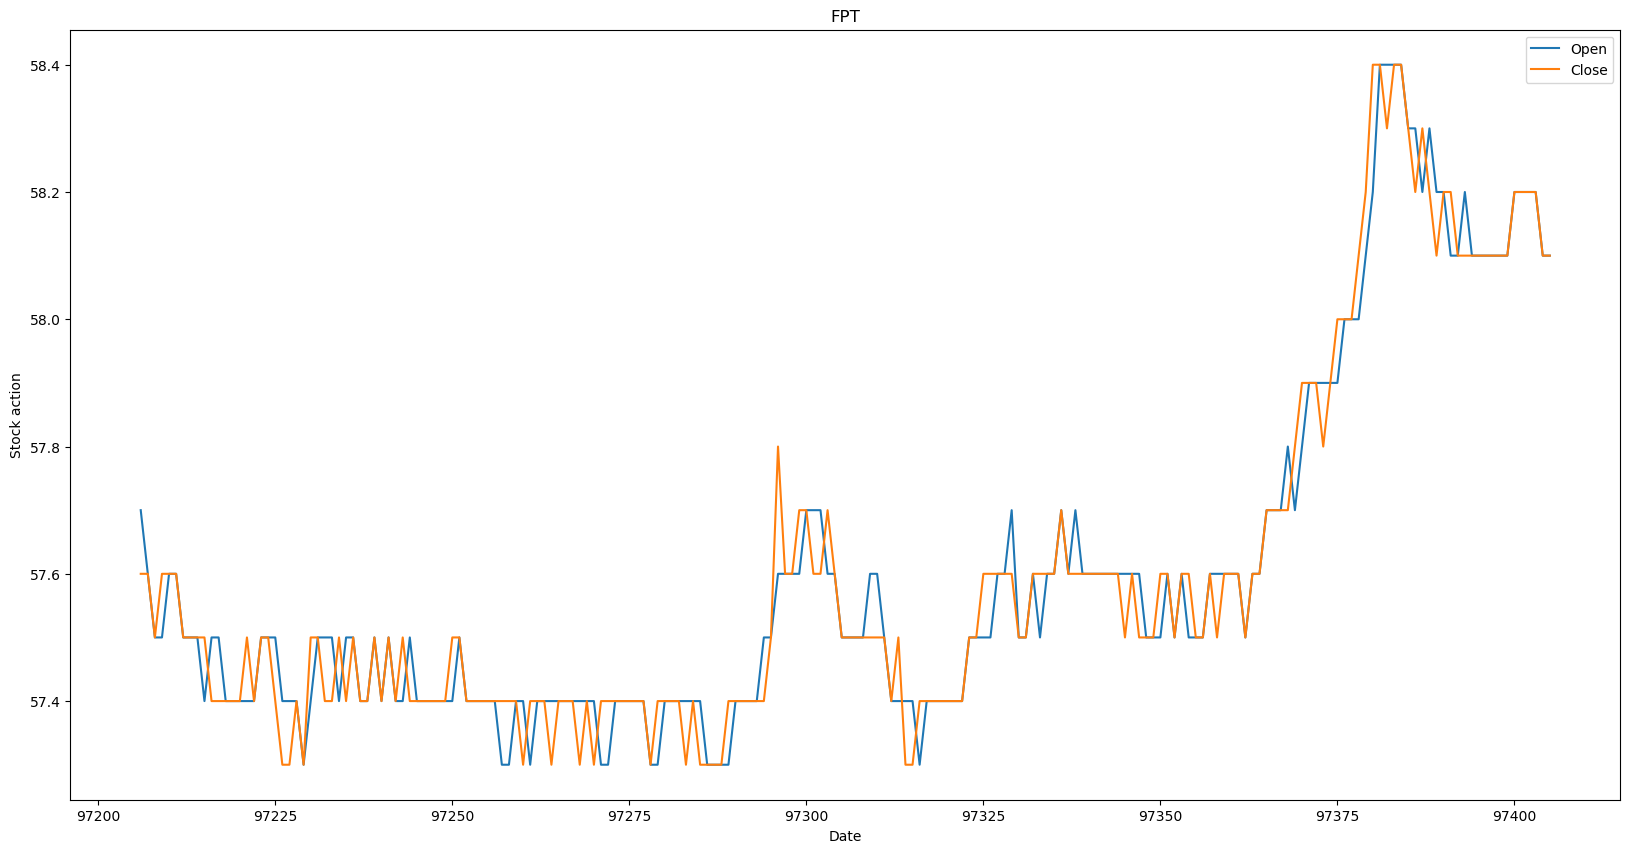

In [11]:
# xem giá mở của và đóng của của 200 lần chốt giá cuối qua giờ phút 
df_fpt[['Open','Close']][-200:].plot(figsize = (20,10), alpha = 1)
plt.title('FPT')
plt.xlabel('Date')
plt.ylabel('Stock action');

<p>  chúng ta có thể thấy rằng giá mở và đóng cửa qua thời gian lấy là không chênh nhau nhiều </p>

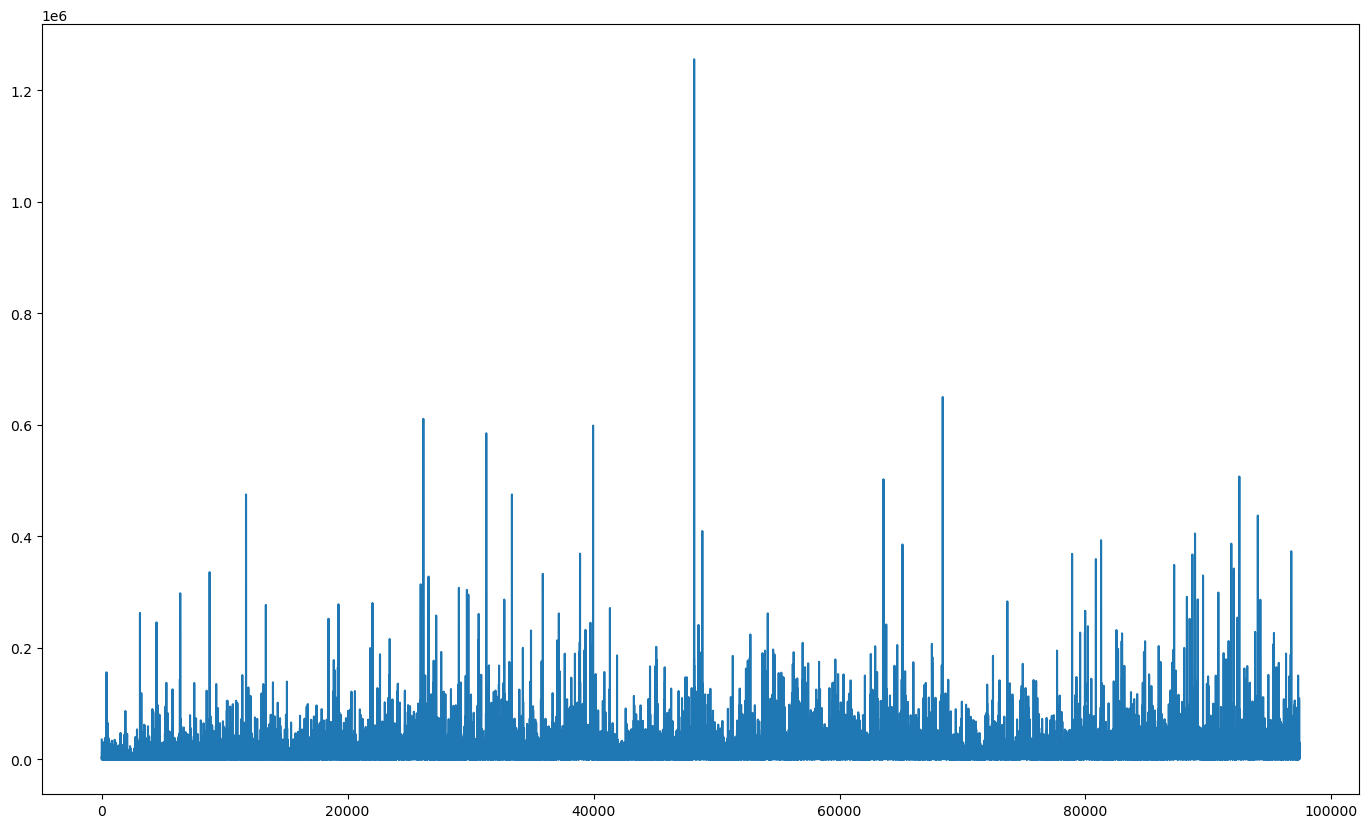

In [12]:
# giá trị đã bán của côt phiếu fpt
plt.figure(figsize=(17, 10))
plt.plot(df_fpt['Volume']);

<p> và số cố phiếu được bán ra là vô cùng nhiều </p>

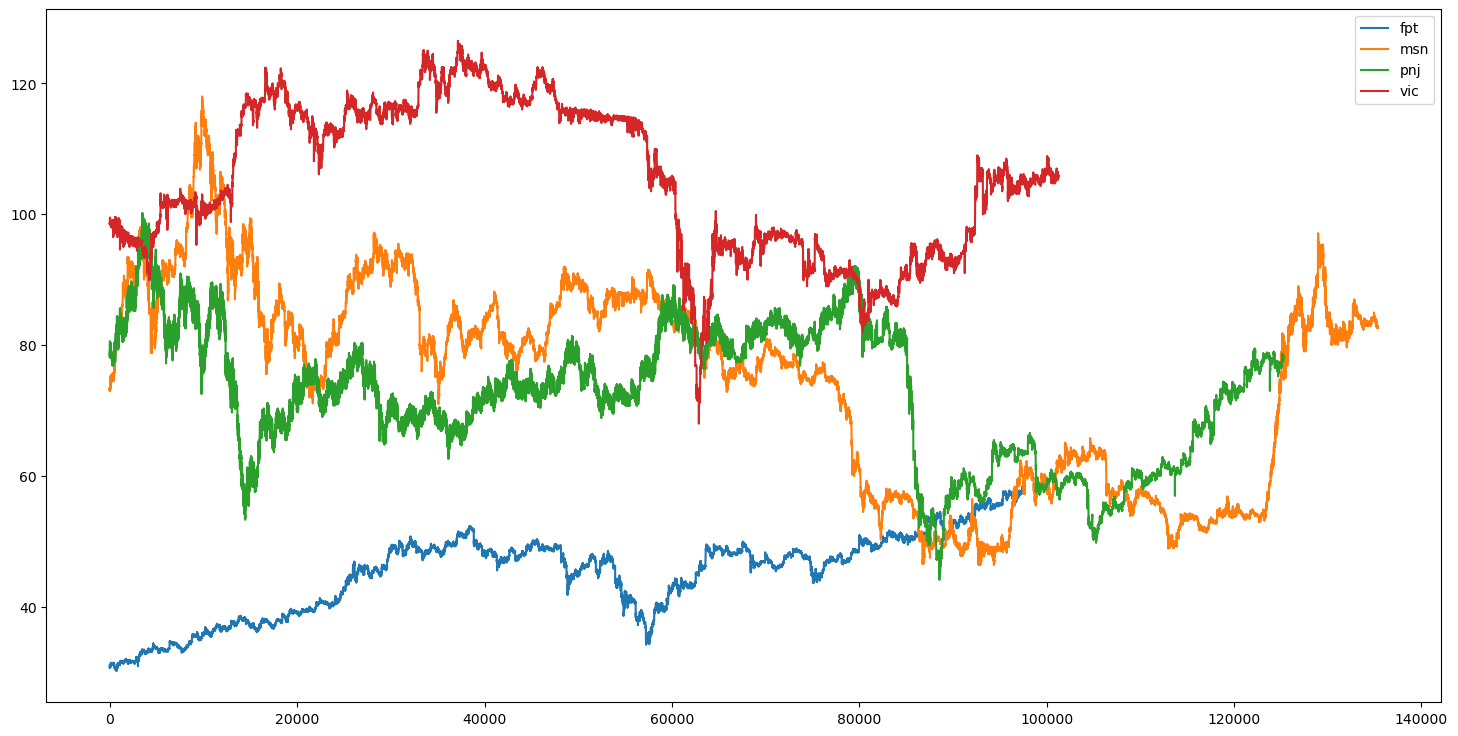

In [13]:
# Biểu đồ plot data giá đóng cửa của fpt, msn, pnj, vic 
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index, df_fpt.Close, label="fpt")
plt.plot(df_msn.index, df_msn.Close, label="msn")
plt.plot(df_pnj.index, df_pnj.Close, label="pnj")
plt.plot(df_vic.index, df_vic.Close, label="vic")
plt.legend()
plt.show()

<p> vin có giá cao nhất và thấp nhất là fpt </p>

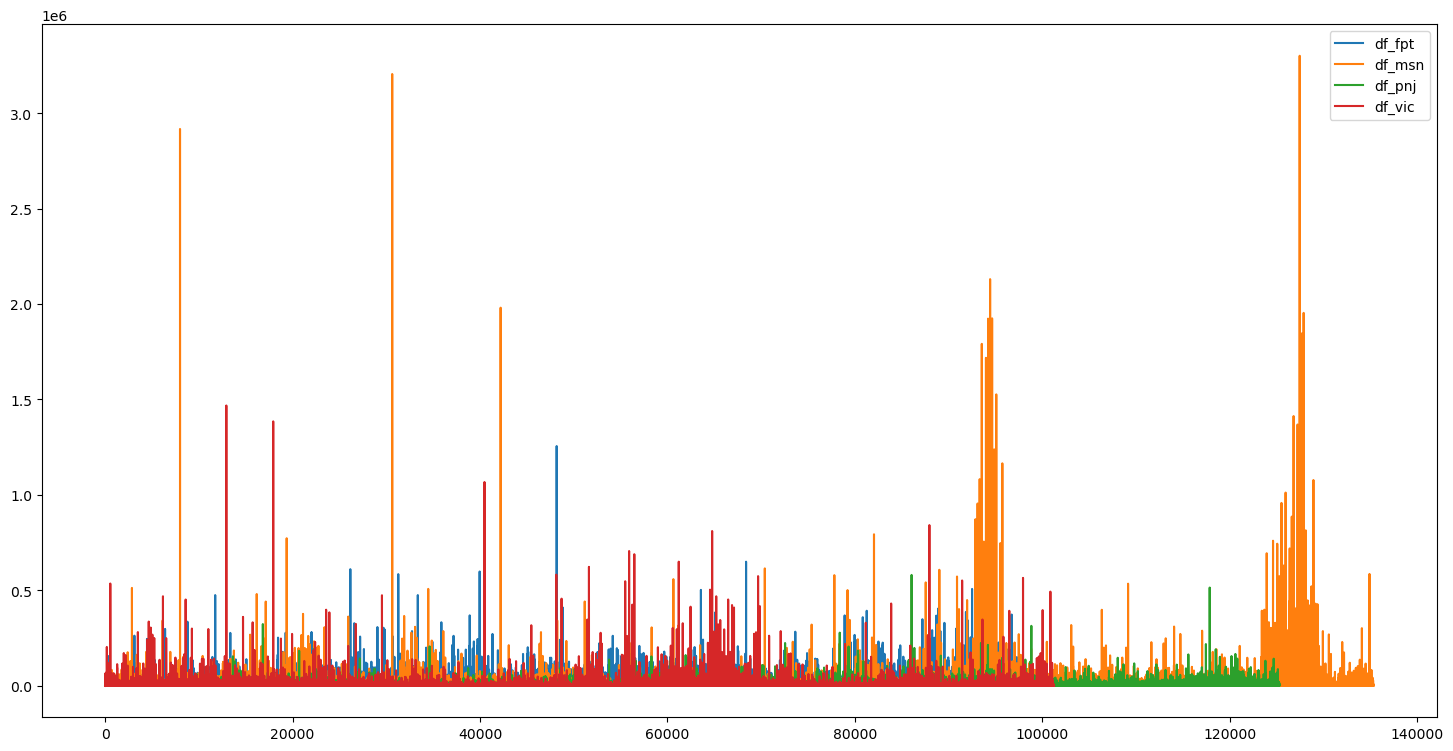

In [14]:
# Biểu đồ plot data số cổ phiếu bán ra của fpt, msn, pnj, vic 
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index, df_fpt.Volume, label="df_fpt")
plt.plot(df_msn.index, df_msn.Volume, label="df_msn")
plt.plot(df_pnj.index, df_pnj.Volume, label="df_pnj")
plt.plot(df_vic.index, df_vic.Volume, label="df_vic")
plt.legend()
plt.show()

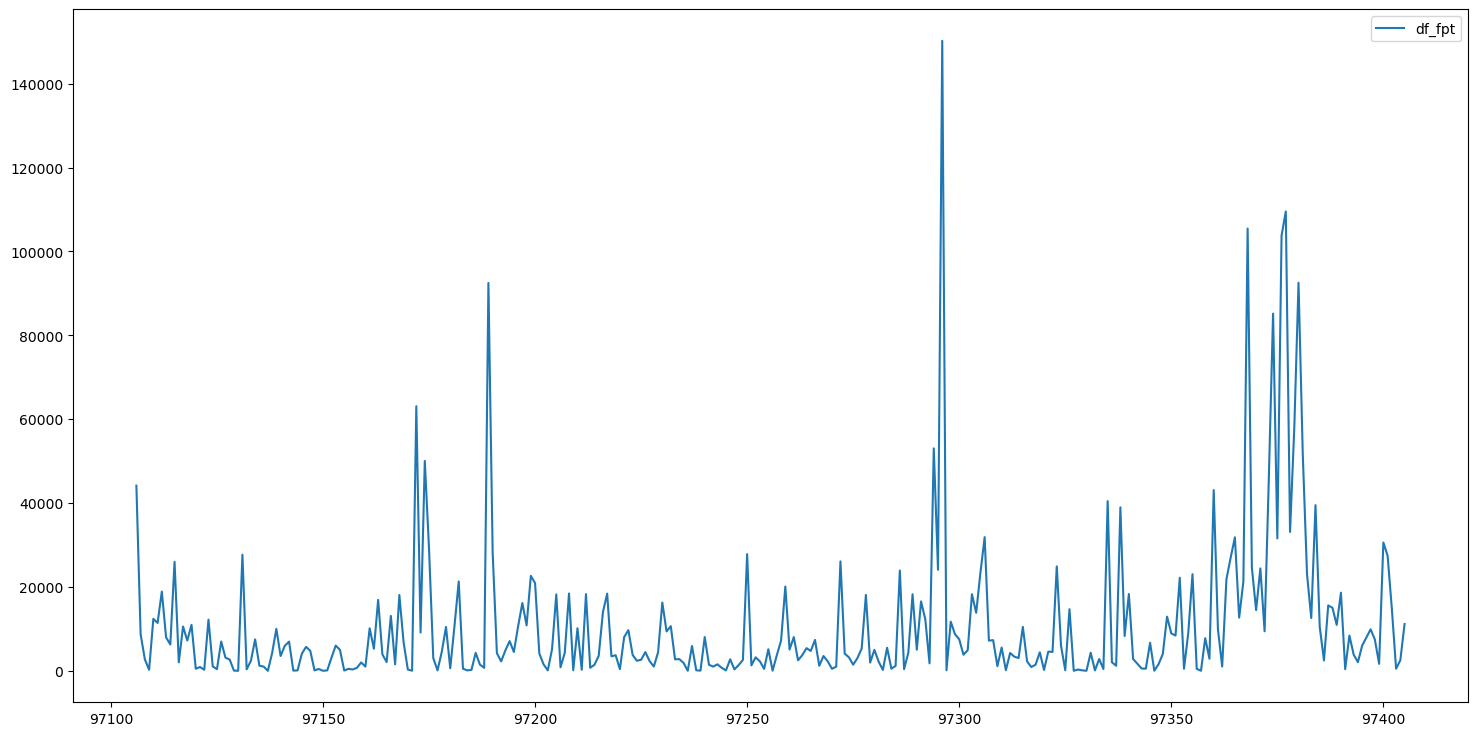

In [15]:
# Biểu đồ plot data số cổ phiếu bán ra của fpt với 300 giá trị cuối
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index[-300:], df_fpt.Volume[-300:], label="df_fpt")
plt.legend()
plt.show()

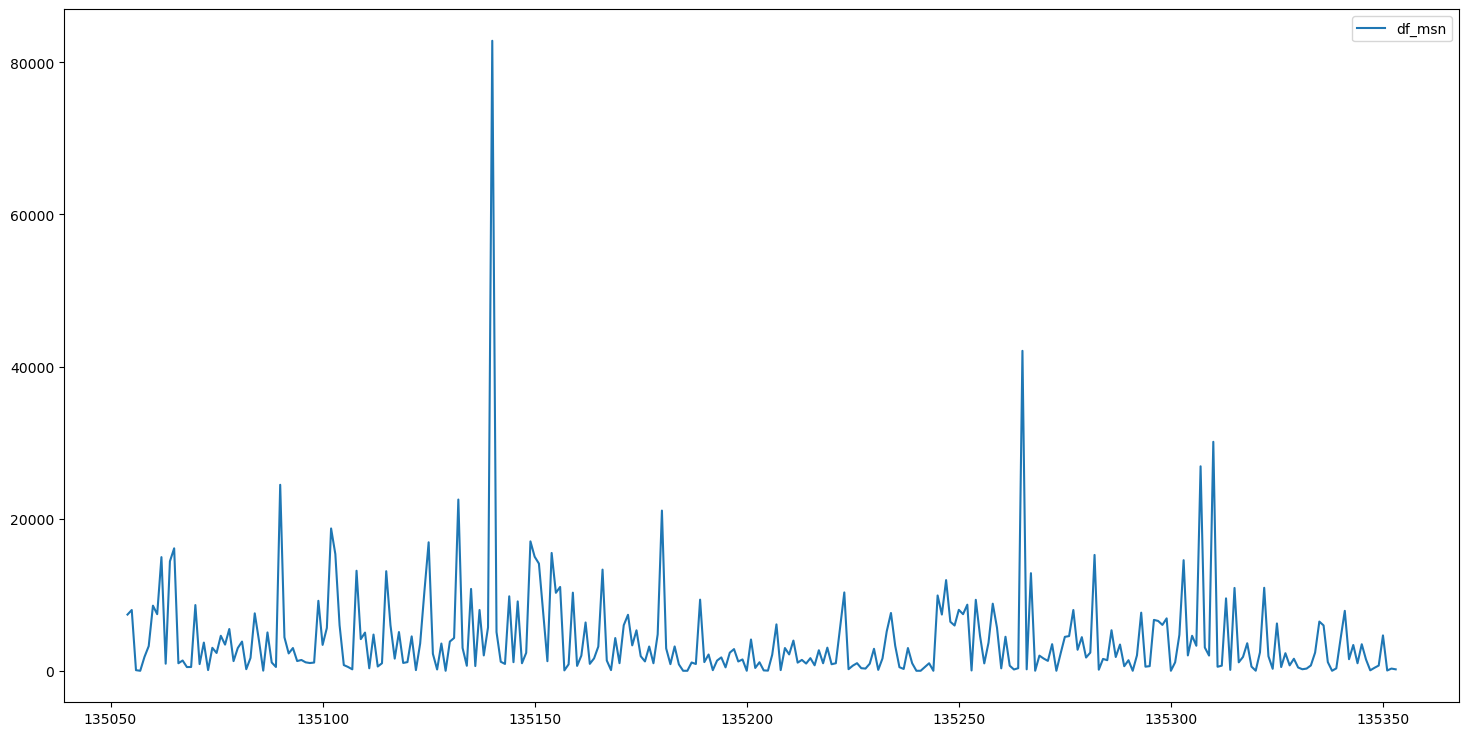

In [16]:
# Biểu đồ plot data số cổ phiếu bán ra của msn với 300 giá trị cuối
plt.figure(figsize=(18,9))
plt.plot(df_msn.index[-300:], df_msn.Volume[-300:], label="df_msn")
plt.legend()
plt.show()

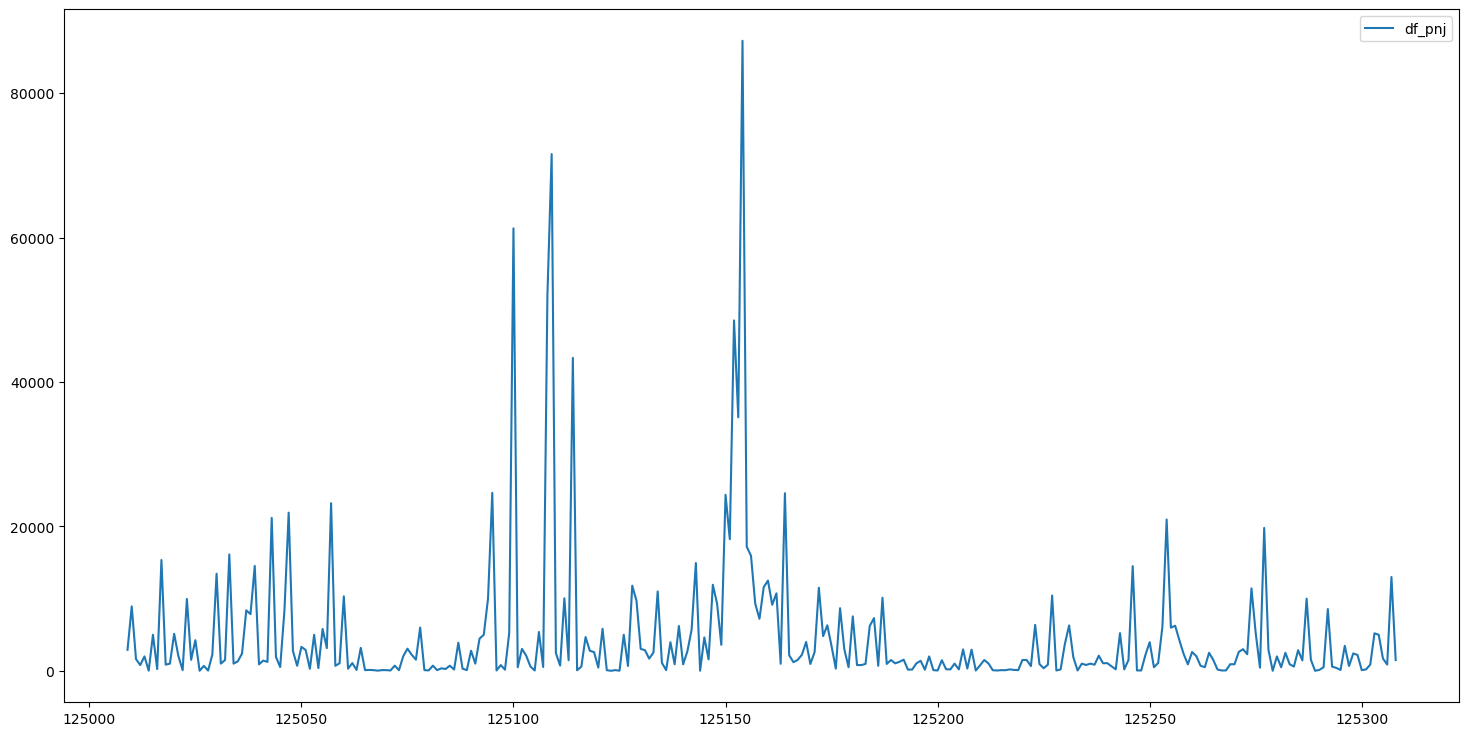

In [17]:
# Biểu đồ plot data số cổ phiếu bán ra của pnj, vic với 300 giá trị cuối
plt.figure(figsize=(18,9))
plt.plot(df_pnj.index[-300:], df_pnj.Volume[-300:], label="df_pnj")
plt.legend()
plt.show()

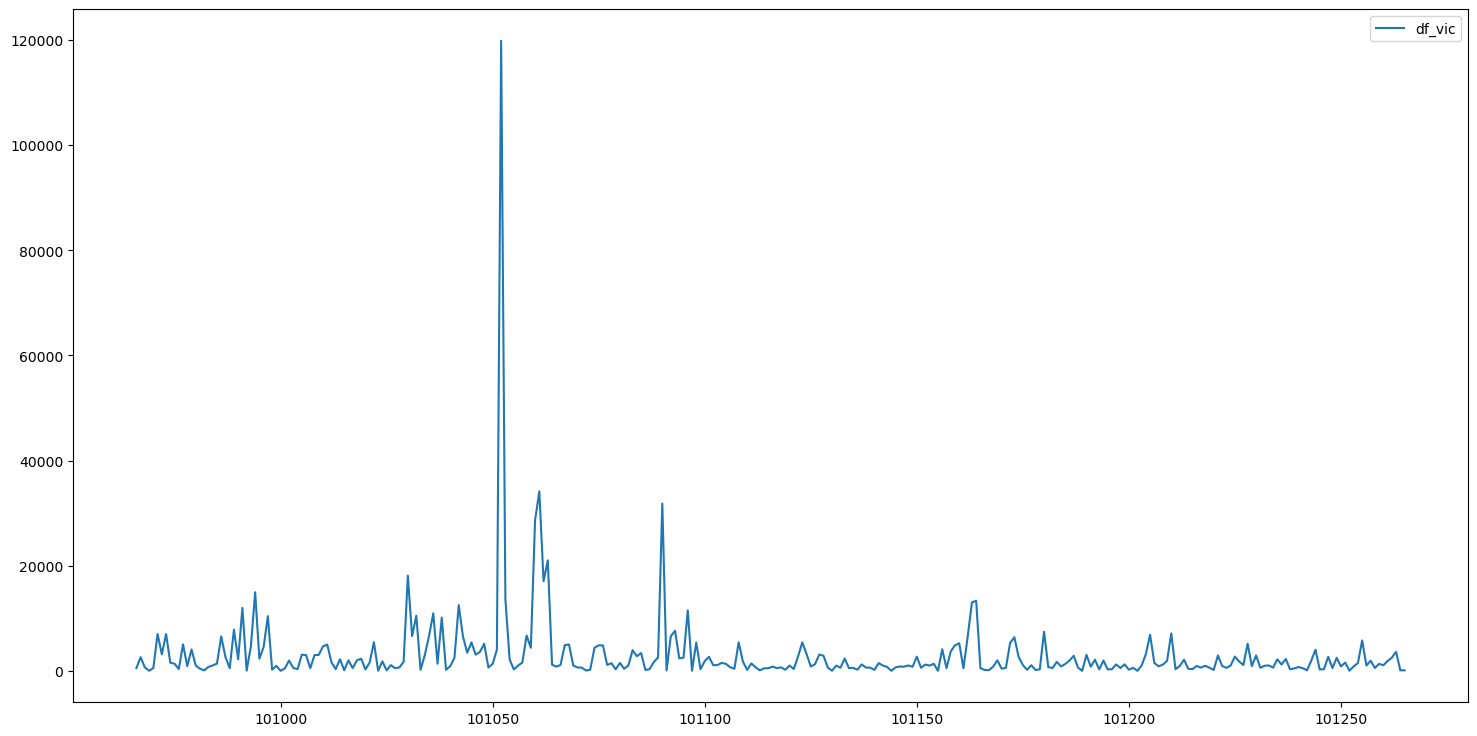

In [18]:
# Biểu đồ plot data số cổ phiếu bán ra của vic với 300 giá trị cuối
plt.figure(figsize=(18,9))
plt.plot(df_vic.index[-300:], df_vic.Volume[-300:], label="df_vic")
plt.legend()
plt.show()

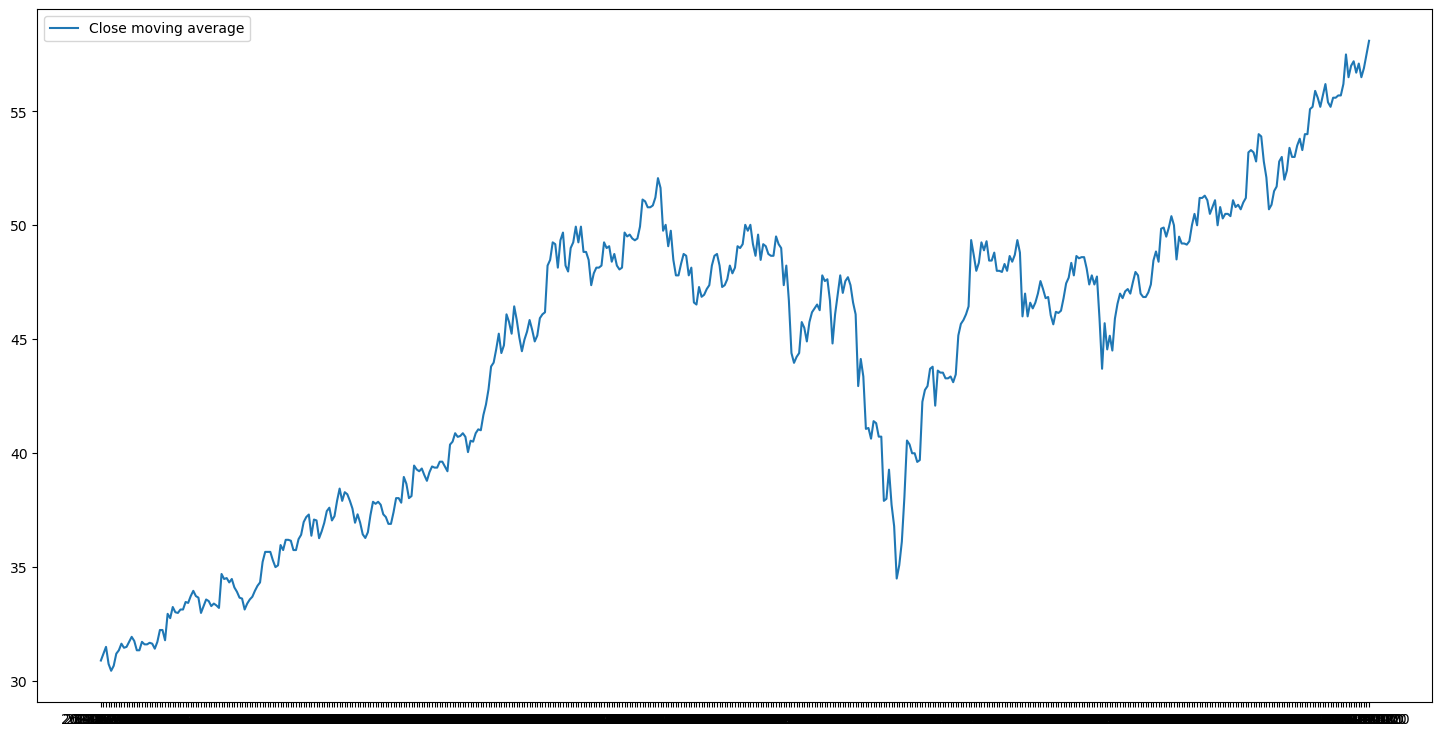

In [19]:
# đường trung bình động của cổ phiếu fpt lấy lúc 14h46p mỗi ngày
moving_average = df_fpt.loc[df_fpt['Time']=='14-46-00']

# Plotting close data 
plt.figure(figsize=(18,9))
plt.plot(moving_average.Date, moving_average.Close, label="Close moving average")
plt.legend()
plt.show()

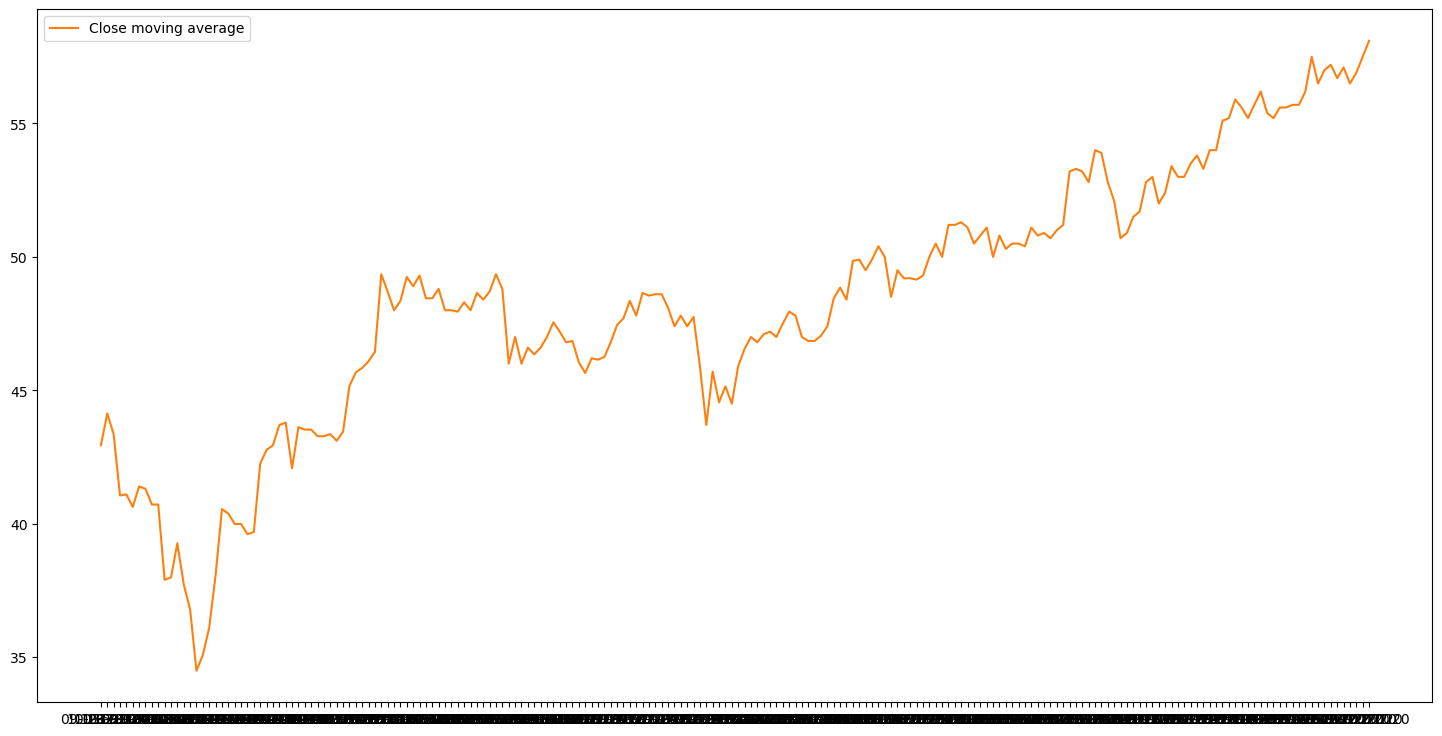

In [20]:
# đường trung bình động của 200 cổ phiếu fpt mói nhất lấy lúc 14h46p
moving_average = df_fpt.loc[df_fpt['Time']=='14-46-00'][-200:]

# Plotting close data 
plt.figure(figsize=(18,9))
plt.plot(moving_average.Date, moving_average.Close,color='#ff7f0e', label="Close moving average")
plt.legend()
plt.show()

In [21]:
# lợi nhuận trung bình hàng ngày
a = df_fpt['Close'].pct_change()

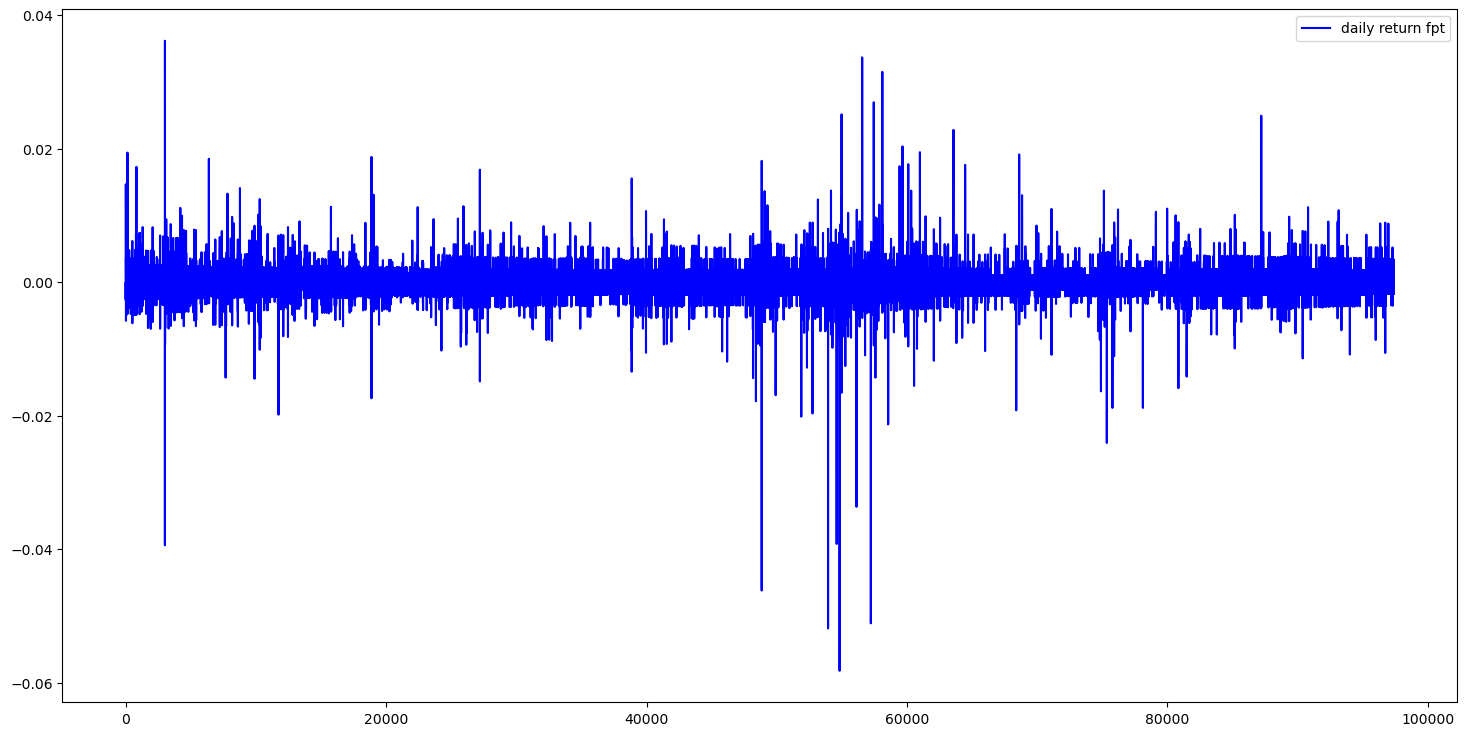

In [22]:
# lợi nhuận trung bình hàng ngày của fpt
df_fpt['daily_return'] = a

plt.figure(figsize=(18,9))
plt.plot(df_fpt.index[:], df_fpt.daily_return[:],color='blue', label="daily return fpt")
#plt.plot(df_fpt.index[-300:], df_fpt.daily_return[-300:],color='blue', label="daily return fpt") # 300 hàng cuối 
plt.legend()
plt.show()

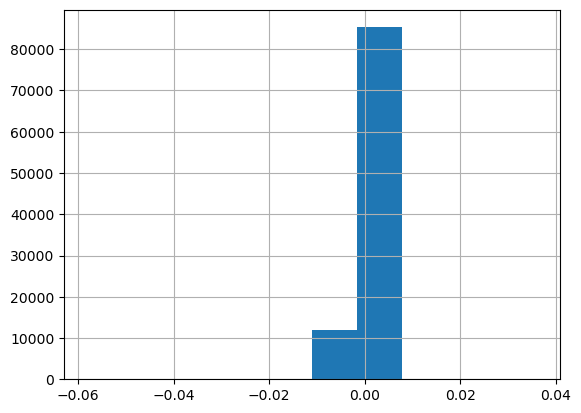

In [23]:
df_fpt['daily_return'].hist(bins=10);

<p> lợi nhuận của fpt là +- 0.1% qua các lần đóng cửa giá cổ phiếu  </p>

In [24]:
# giá close qua các năm của fpt
close_fpt = df_fpt
close_fpt['Year'] = pd.to_datetime(close_fpt['Date']).dt.strftime('%Y')
close_fpt18 = close_fpt.loc[close_fpt['Year'] == '2018'].reset_index().drop(columns=['index'])
close_fpt19 = close_fpt.loc[close_fpt['Year'] == '2019'].reset_index().drop(columns=['index'])
close_fpt20 = close_fpt.loc[close_fpt['Year'] == '2020'].reset_index().drop(columns=['index'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '25-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '28-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-01-2019' in DD/MM/YYYY format. Pro

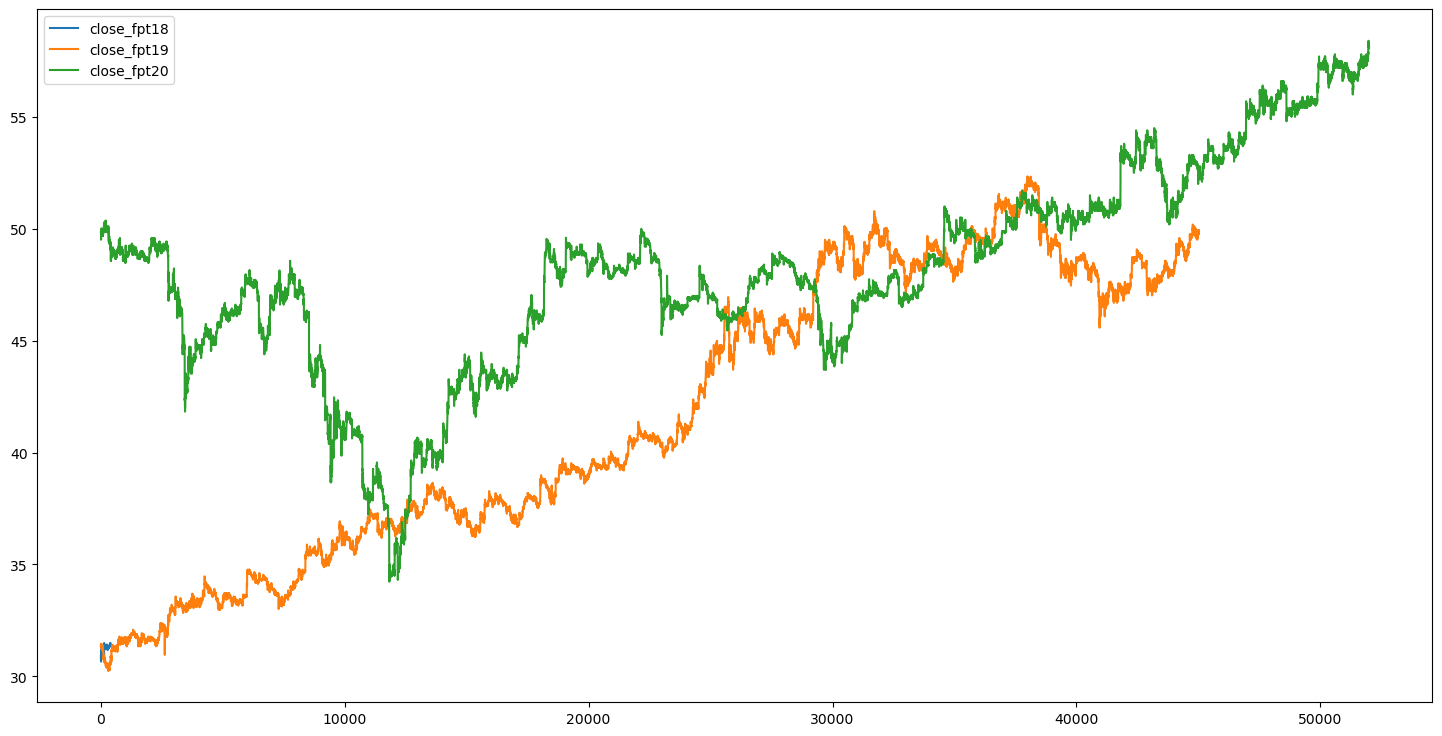

In [25]:
# giá close qua các năm của fpt
plt.figure(figsize=(18,9))
plt.plot(close_fpt18.index, close_fpt18.Close,color='#1f77b4', label="close_fpt18")
plt.plot(close_fpt19.index, close_fpt19.Close,color='#ff7f0e', label="close_fpt19")
plt.plot(close_fpt20.index, close_fpt20.Close,color='#2ca02c', label="close_fpt20")
plt.legend()
plt.show()

<p> giá cổ phiếu được bán ở năm 2019 là tăng dần và trùng lại ở cuối năm .Bước sang 2020 giá cổ phiếu giao động lớn do dịch bệnh </p>

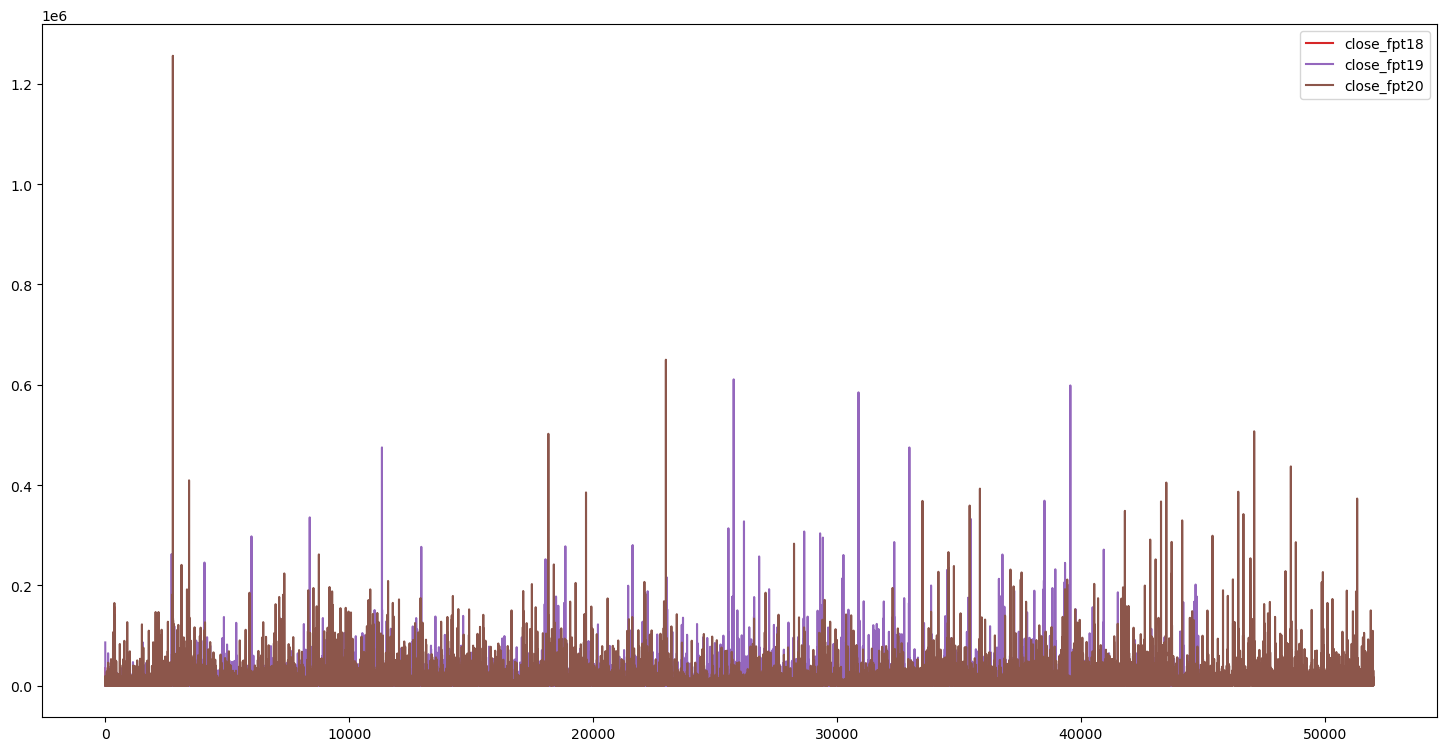

In [26]:
# giá Volume qua các năm của fpt
plt.figure(figsize=(18,9))
plt.plot(close_fpt18.index, close_fpt18.Volume,color='#d62728', label="close_fpt18")
plt.plot(close_fpt19.index, close_fpt19.Volume,color='#9467bd', label="close_fpt19")
plt.plot(close_fpt20.index, close_fpt20.Volume,color='#8c564b', label="close_fpt20")
plt.legend()
plt.show()

In [27]:
close_fpt18_month = close_fpt18
close_fpt18_month['month'] = pd.to_datetime(close_fpt18_month['Date']).dt.strftime('%m')


close_fpt19_month = close_fpt19
close_fpt19_month['month'] = pd.to_datetime(close_fpt19_month['Date']).dt.strftime('%m')


close_fpt20_month = close_fpt20
close_fpt20_month['month'] = pd.to_datetime(close_fpt20_month['Date']).dt.strftime('%m')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '25-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '26-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '28-12-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-01-2019' in DD/MM/YYYY format. Pro

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '17-01-2020' in DD/MM/YYYY format. Pro

In [28]:
# giá mở cửa tung bình của fpt năm 2020 qua các tháng

In [29]:
close_fpt18_month1 = close_fpt18_month.groupby('month').agg({'Close': 'mean'})

close_fpt19_month1 = close_fpt19_month.groupby('month').agg({'Close': 'mean'})

close_fpt20_month1 = close_fpt20_month.groupby('month').agg({'Close': 'mean'})

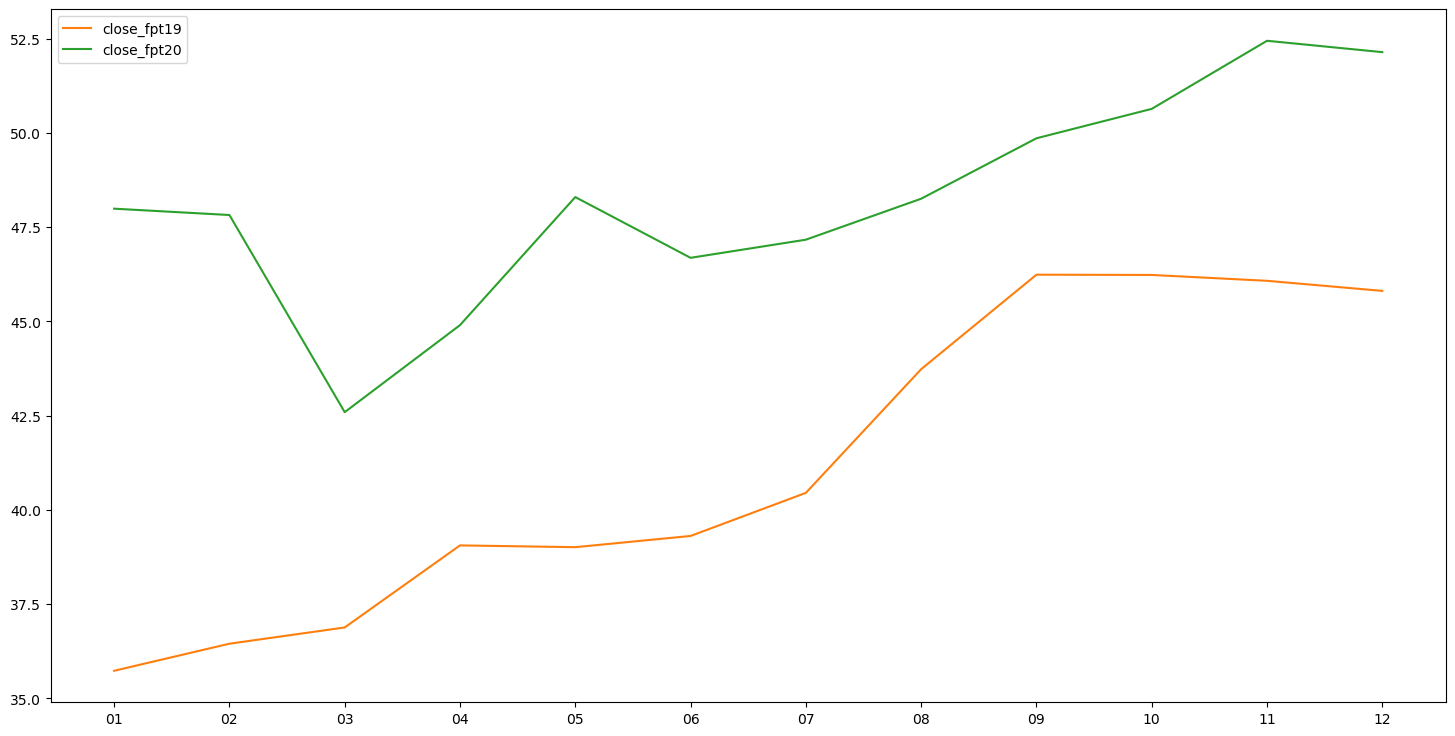

In [30]:
# Plotting giá đóng cửa
plt.figure(figsize=(18,9))
#plt.plot(close_fpt18_month1.index, close_fpt18_month1.Close,color='#1f77b4', label="close_fpt18")
plt.plot(close_fpt19_month1.index, close_fpt19_month1.Close,color='#ff7f0e', label="close_fpt19")
plt.plot(close_fpt20_month1.index, close_fpt20_month1.Close,color='#2ca02c', label="close_fpt20")
plt.legend()
plt.show()

<p> tháng 3 2020 cổ phiếu fpt tụt mạnh và đần hồi phục trở lại </p>

#  Biến động giá cổ phiếu thực tế

In [31]:
# Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày)sau - Giá cổ phiếu hiện tại.
len_df_fpt = len(df_fpt)
price_volatility =[]
len_df_fpt

for i in range(1,len_df_fpt):
    j=i-1
    a = round((df_fpt['Close'][i])-(df_fpt['Close'][j]),3)
    price_volatility.append(a)
    
    
# Bien dong gia cua fpt
df_fpt = df_fpt[1:]
df_fpt['price_volatility'] = price_volatility


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4664\3127521267.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



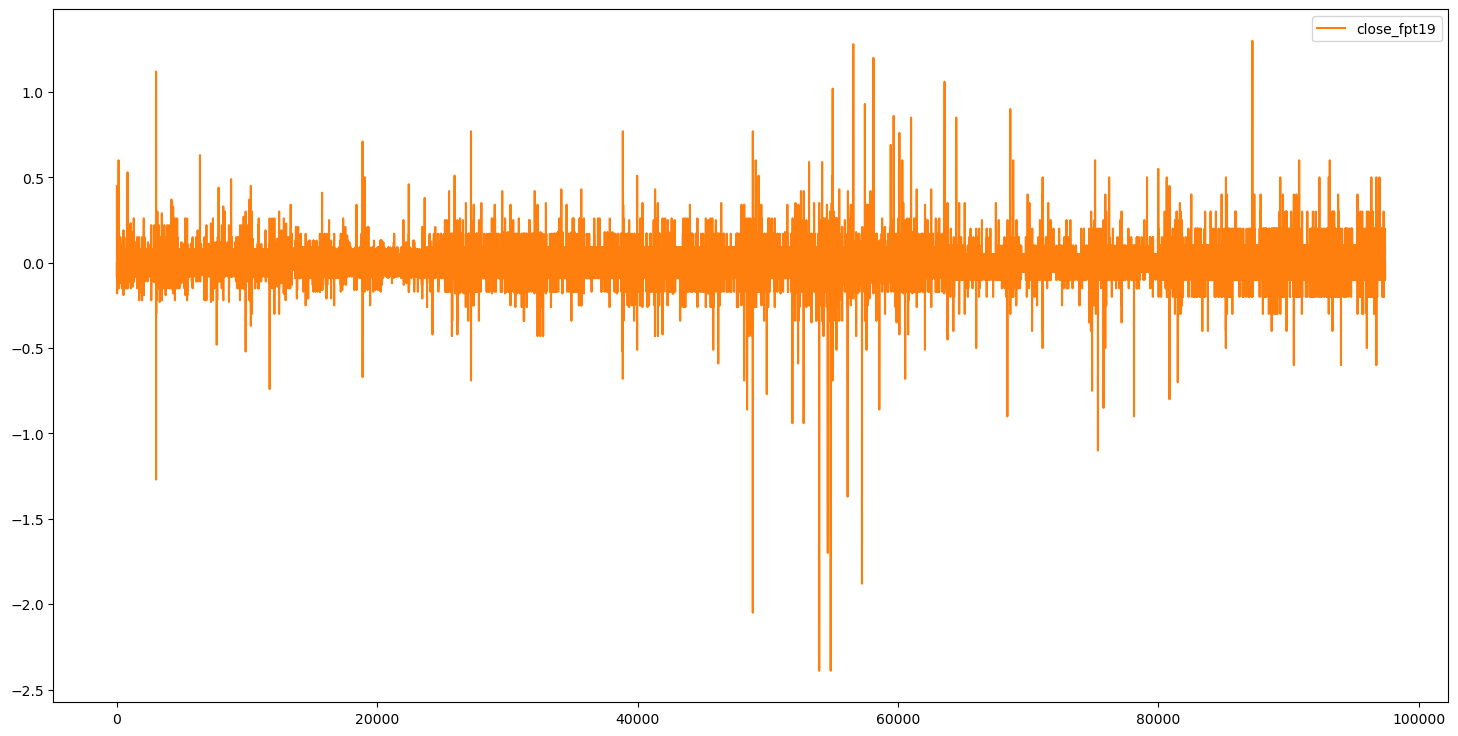

In [32]:
# Biến động giá cổ phiếu fpt
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index, df_fpt.price_volatility,color='#ff7f0e', label="close_fpt19")
plt.legend()
plt.show()

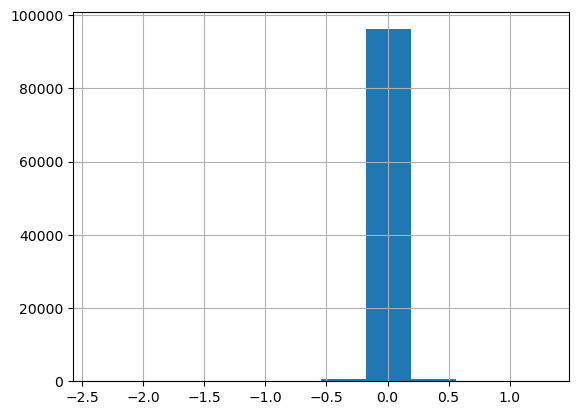

In [33]:
df_fpt['price_volatility'].hist(bins=10);

<p> trên thực tế giá cổ phiếu biến động +-0.5% </p>

# Chuẩn bị dữ liệu

###  MinMaxScaler data

In [34]:
data = df_fpt.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)))


In [35]:
from sklearn.preprocessing import MinMaxScaler

# min max scaler data 
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

scaler_data

array([[0.01989343],
       [0.01740675],
       [0.01740675],
       ...,
       [0.9928952 ],
       [0.98934281],
       [0.98934281]])

### tạo tập dữ liệu

In [36]:
# với train = 80000 dữ liệu và test = 17406 dữ liệu
train_data = scaler_data[:80000]
a = len(train_data)



In [37]:
# tạo vòng lặp dữ liệu với 60 giá biến động dự đoán cho 1 giá biến động tiếp theo
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# đưa về dạng numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

# reshape về mảng 1 chiều
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [38]:
x_train

array([[0.01989343, 0.01740675, 0.01740675, ..., 0.03055062, 0.03055062,
        0.03197158],
       [0.01740675, 0.01740675, 0.01740675, ..., 0.03055062, 0.03197158,
        0.03197158],
       [0.01740675, 0.01740675, 0.01740675, ..., 0.03197158, 0.03197158,
        0.03197158],
       ...,
       [0.64653641, 0.64653641, 0.64831261, ..., 0.73357016, 0.73357016,
        0.73357016],
       [0.64653641, 0.64831261, 0.64831261, ..., 0.73357016, 0.73357016,
        0.73712256],
       [0.64831261, 0.64831261, 0.64831261, ..., 0.73357016, 0.73712256,
        0.73357016]])

In [39]:
y_train

array([0.03197158, 0.03197158, 0.03055062, ..., 0.73712256, 0.73357016,
       0.73357016])

### tạo tập test

In [40]:
# tạo vòng lặp dữ liệu với 60 giá biến động dự đoán cho 1 giá biến động tiếp theo
test_data = scaler_data[a:]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])

# đưa về dạng numpy array
x_test = np.array(x_test)


# xây dựng mạng nơ-ron dự đoán

### Xây dựng mạng RNN

In [41]:
# import thư viện cần thiết
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM, Dense, Dropout, Bidirectional, Embedding
from keras.models import load_model, Model

from collections import Counter
from tensorflow.keras.callbacks import ModelCheckpoint

In [42]:
# tạo mạng nơ ron cơ bản
model1 = Sequential()
model1.add(Embedding(32,16))
model1.add(SimpleRNN(16))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          512       
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                528       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [43]:
model1.fit(x_train,y_train, epochs=10)

Epoch 1/10
2499/2499 [==============================] - 39s 15ms/step - loss: 0.6911 - acc: 7.5056e-05
Epoch 2/10
2499/2499 [==============================] - 29s 12ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 3/10
2499/2499 [==============================] - 32s 13ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 4/10
2499/2499 [==============================] - 29s 12ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 5/10
2499/2499 [==============================] - 28s 11ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 6/10
2499/2499 [==============================] - 31s 12ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 7/10
2499/2499 [==============================] - 32s 13ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 8/10
2499/2499 [==============================] - 29s 11ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 9/10
2499/2499 [==============================] - 29s 11ms/step - loss: 0.6910 - acc: 7.5056e-05
Epoch 10/10
2499/2499 [==============================] - 29s 12ms/step - 

In [44]:
predict1 = model1.predict(x_test)
predict1 = scaler.inverse_transform(predict1)
predict1

543/543 [==============================] - 2s 4ms/step


array([[43.516544],
       [43.516544],
       [43.516544],
       ...,
       [43.523857],
       [43.507545],
       [43.52949 ]], dtype=float32)

<p>=> Từ trên ta thấy mạng RNN có kết quả chưa tốt lắm !</p>

### Xây dựng mạng LSTM

In [45]:
# sử dụng mạng với 2 lớp LSTM và đầu ra là 1
model91 = Sequential()
model91.add(LSTM(64,return_sequences=True,input_shape=(60,1)))
model91.add(LSTM(32, return_sequences=False))
#model91.add(Dense(16))
model91.add(Dense(1))

# sử dụng trình tối ưu hóa adam để bài toán nhanh hơn 
model91.compile( optimizer='adam', loss='mean_squared_error', metrics=['acc'])
print(model91.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
#model91.fit(x_train, y_train, epochs=3)

In [47]:
# sử dụng ModelCheckpoint để luu kế quả model tốt nhất
save_model = "save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
lstm_model = model91.fit(x_train,y_train,epochs = 15,verbose=2,callbacks=[best_model])

Epoch 1/15

Epoch 1: loss improved from inf to 0.00056, saving model to save_model.hdf5
2499/2499 - 125s - loss: 5.6190e-04 - acc: 7.5056e-05 - 125s/epoch - 50ms/step
Epoch 2/15

Epoch 2: loss improved from 0.00056 to 0.00003, saving model to save_model.hdf5
2499/2499 - 169s - loss: 2.6265e-05 - acc: 7.5056e-05 - 169s/epoch - 68ms/step
Epoch 3/15

Epoch 3: loss improved from 0.00003 to 0.00002, saving model to save_model.hdf5
2499/2499 - 196s - loss: 2.1575e-05 - acc: 7.5056e-05 - 196s/epoch - 78ms/step
Epoch 4/15

Epoch 4: loss improved from 0.00002 to 0.00002, saving model to save_model.hdf5
2499/2499 - 188s - loss: 1.5423e-05 - acc: 7.5056e-05 - 188s/epoch - 75ms/step
Epoch 5/15

Epoch 5: loss improved from 0.00002 to 0.00001, saving model to save_model.hdf5
2499/2499 - 180s - loss: 1.2105e-05 - acc: 7.5056e-05 - 180s/epoch - 72ms/step
Epoch 6/15

Epoch 6: loss improved from 0.00001 to 0.00001, saving model to save_model.hdf5
2499/2499 - 184s - loss: 9.6212e-06 - acc: 7.5056e-05 - 1

### Dự đoán giá đóng cửa 

In [48]:
lstm_model=load_model('save_model.hdf5')

In [49]:
predict9 = lstm_model.predict(x_test)
# trả về giad trị thực
predict9 = scaler.inverse_transform(predict9)

543/543 [==============================] - 18s 30ms/step


In [50]:
data1 = df_fpt.filter(['Close','price_volatility'])[len(df_fpt)-len(predict9):]
data1.head()

Close  price_volatility
80061   50.7               0.0
80062   50.6              -0.1
80063   50.7               0.1
80064   50.7               0.0
80065   50.7               0.0

In [51]:
data1['predict'] = predict9
data11 = data1
data1 = data1.reset_index().drop(['index'],axis=1)
data1.head()

Close  price_volatility    predict
0   50.7               0.0  50.790073
1   50.6              -0.1  50.790051
2   50.7               0.1  50.702011
3   50.7               0.0  50.778755
4   50.7               0.0  50.788799

<p> giá trị thực và giá trị dự đoán sát nhau  </p>

###  tính sai số

In [52]:
aaa = len(dataset)- len(x_test)
y_test = dataset[aaa:]

diff = predict9 - y_test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 0.011074341389099069
MAE: 0.08776553358802125
RMSE: 0.1052346966979003


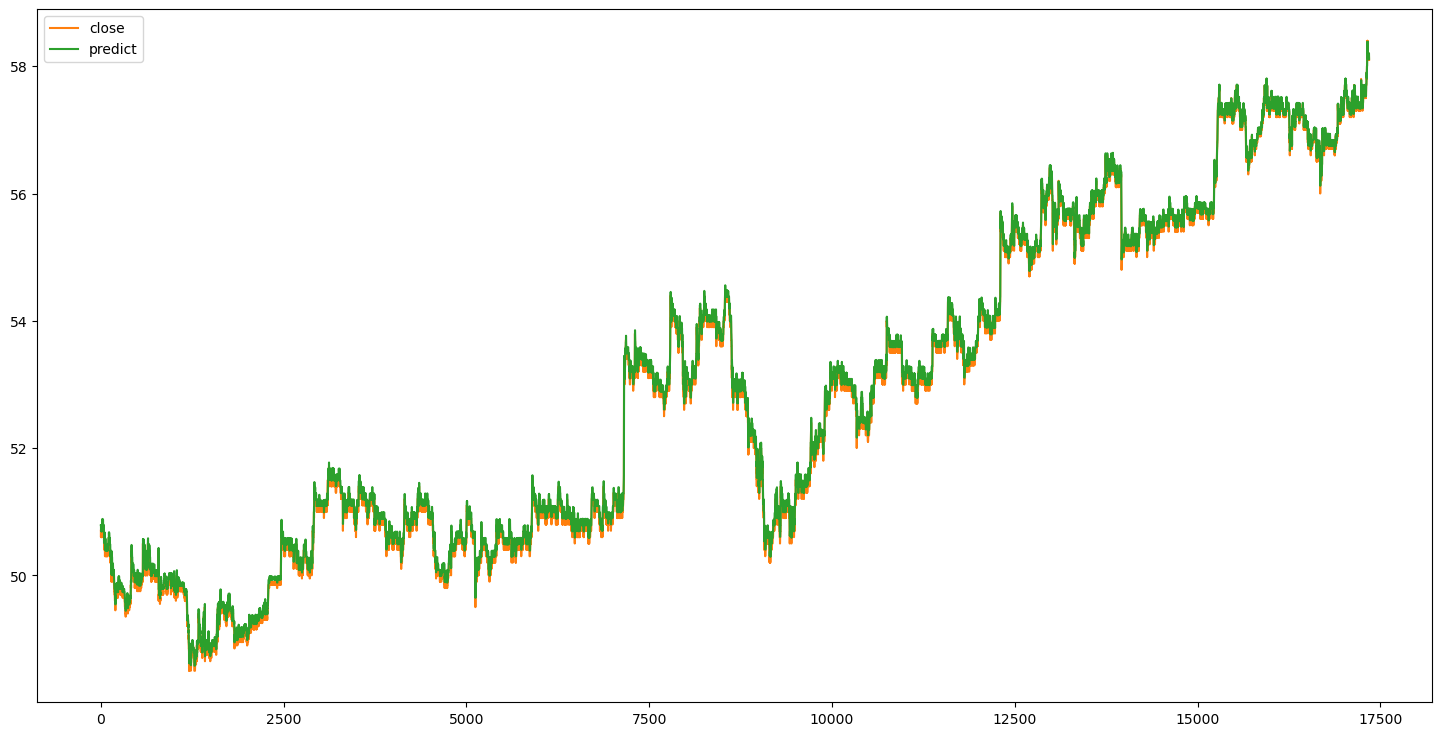

In [54]:
# trục quan hóa giá dự đoán và giá thực tế
plt.figure(figsize=(18,9))
plt.plot(data1.index, data1.Close,color='#ff7f0e', label="close")
plt.plot(data1.index, data1.predict,color='#2ca02c', label="predict")
plt.legend()
plt.show()

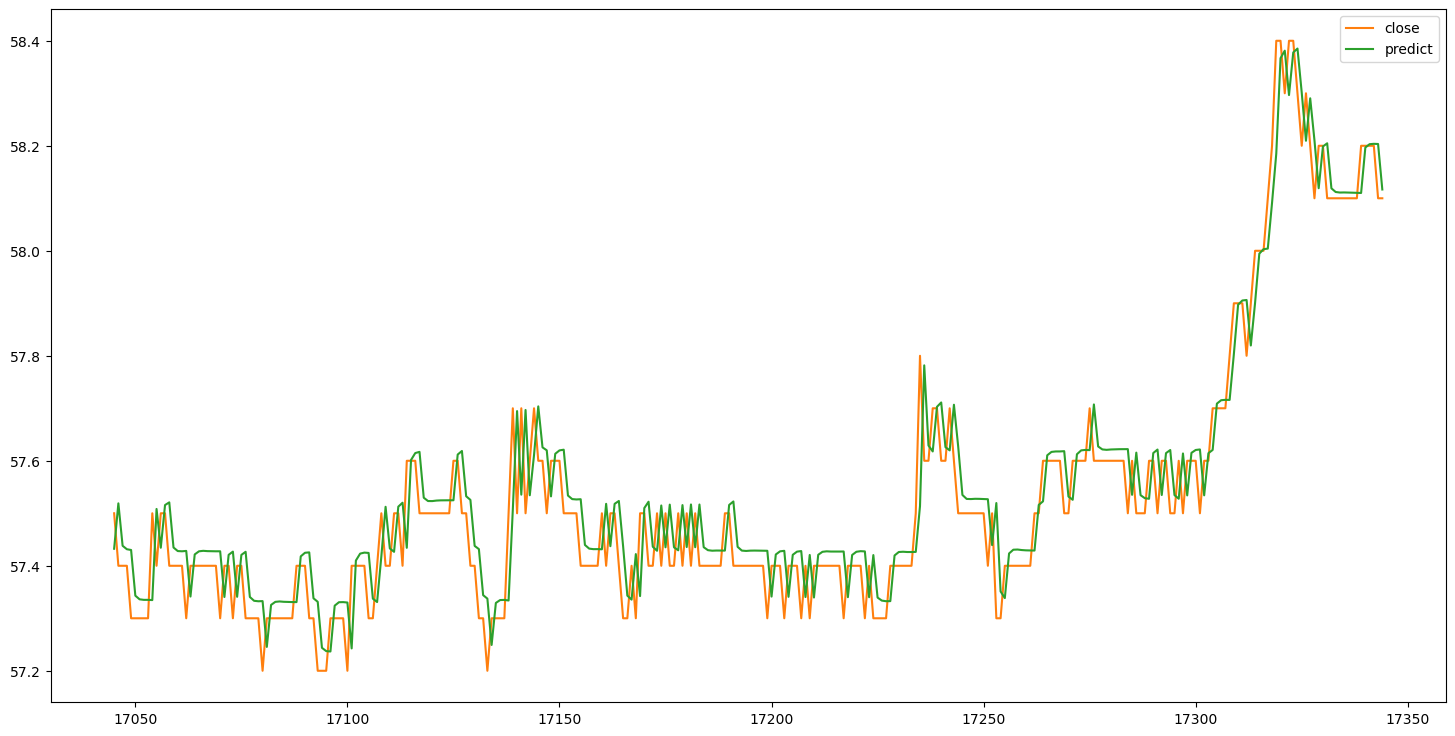

In [55]:
# trục quan hóa giá dự đoán và giá thực tế
plt.figure(figsize=(18,9))
plt.plot(data1.index[-300:], data1.Close[-300:],color='#ff7f0e', label="close")
plt.plot(data1.index[-300:], data1.predict[-300:],color='#2ca02c', label="predict")
plt.legend()
plt.show()

<p> ở đây chúng ta thấy rằng kết quả đã gần sát nhau </p> 

# Biến động giá cổ phiếu dự đoán 

In [56]:
# Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày)sau - Giá cổ phiếu hiện tại.
len_df_fpt1 = len(data1)
price_volatility1 =[]


for i in range(1,len_df_fpt1):
    j=i-1
    a = round((data1['predict'][i])-(data1['predict'][j]),3)
    price_volatility1.append(a)
    
    
# Bien dong gia cua fpt
data2 = data1[1:]
data2['price_volatility_predict'] = price_volatility1
data2

data11 =  data11[1:]
data11['price_volatility_predict'] = price_volatility1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4664\3180249142.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



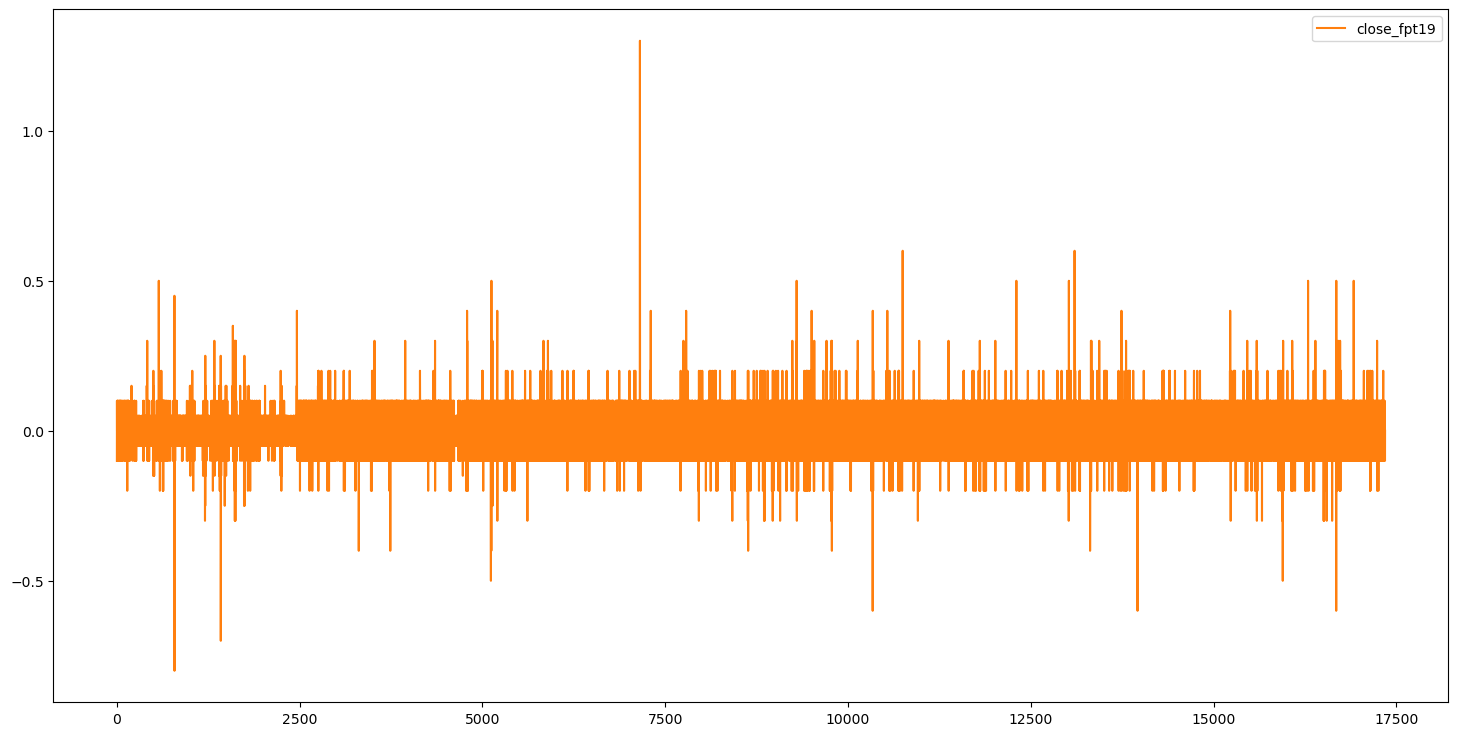

In [57]:
# Biến động giá cổ phiếu fpt dự đoán
plt.figure(figsize=(18,9))
plt.plot(data2.index, data2.price_volatility,color='#ff7f0e', label="close_fpt19")
plt.legend()
plt.show()

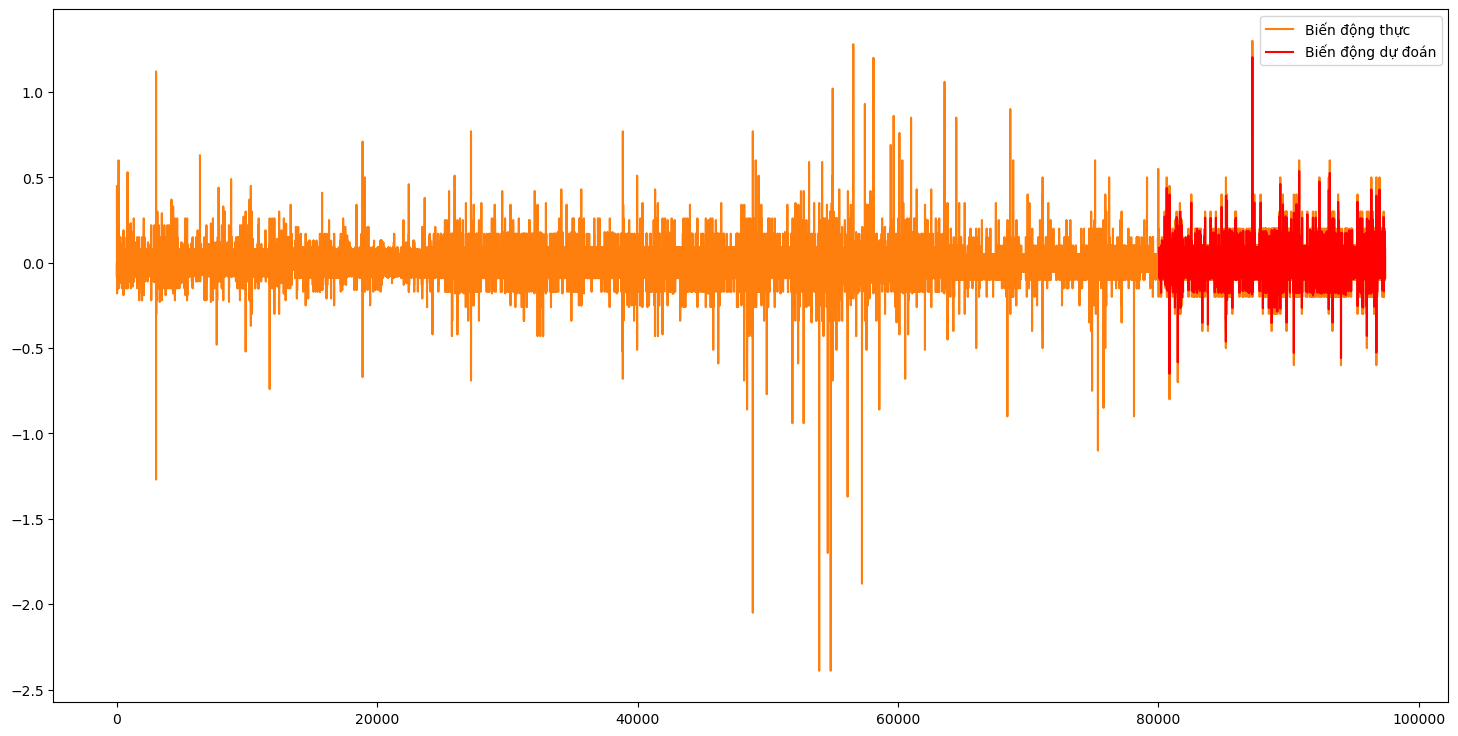

In [58]:
# Biến động giá cổ phiếu fpt thực tế và dự đoán 
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index, df_fpt.price_volatility,color='#ff7f0e', label="Biến động thực")
plt.plot(data11.index, data2.price_volatility_predict,color='red', label="Biến động dự đoán")
plt.legend()
plt.show()

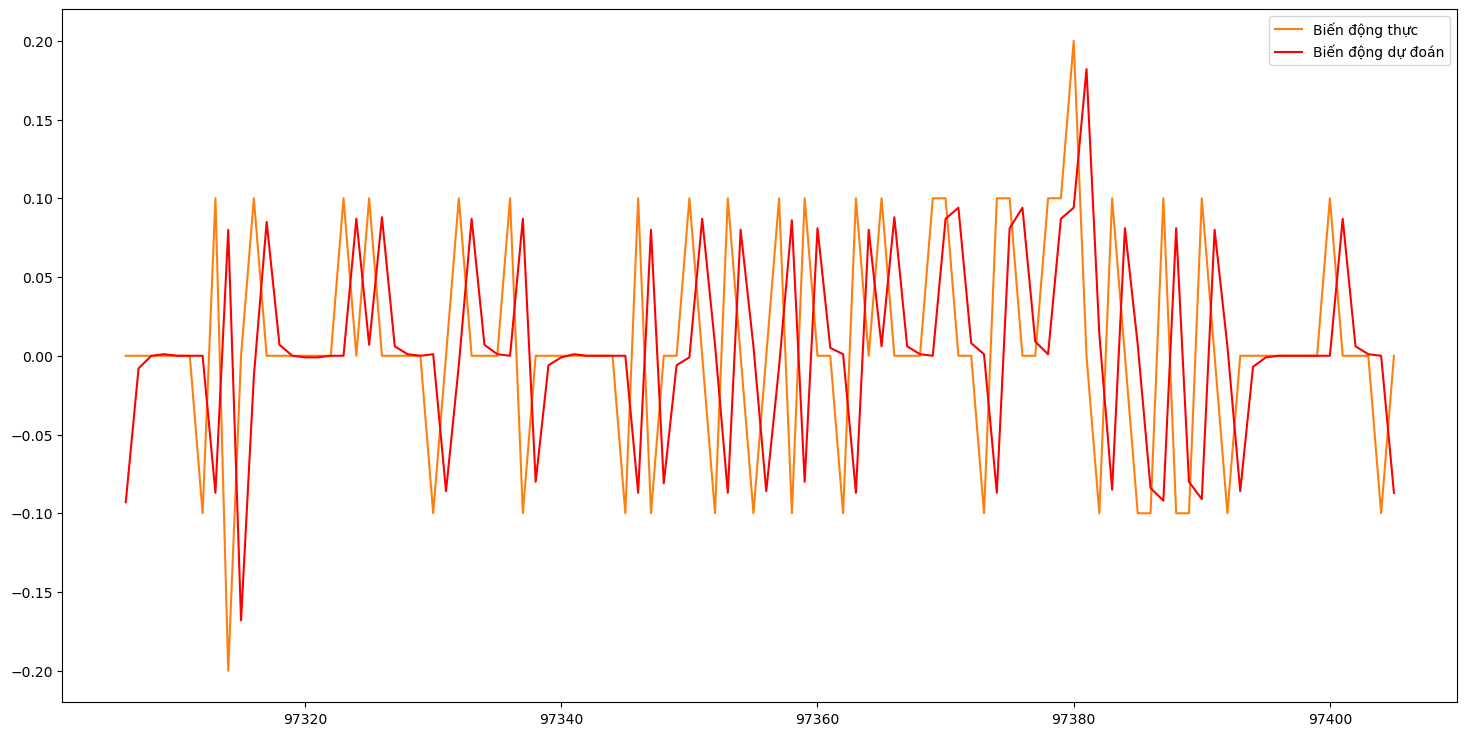

In [59]:
# Biến động giá cổ phiếu fpt thực tế và dự đoán 
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index[-100:], df_fpt.price_volatility[-100:],color='#ff7f0e', label="Biến động thực")
plt.plot(data11.index[-100:], data2.price_volatility_predict[-100:],color='red', label="Biến động dự đoán")
plt.legend()
plt.show()

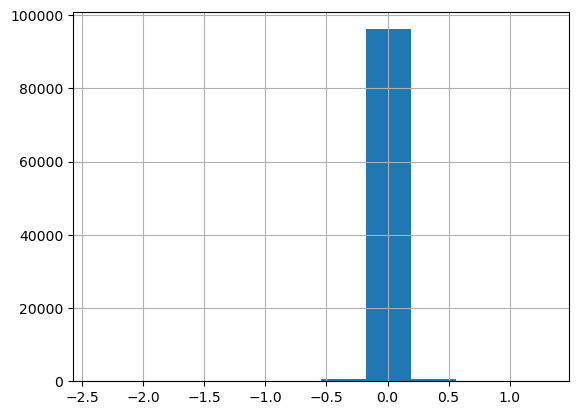

In [60]:
# giá biến động cổ phiếu thực tế
df_fpt['price_volatility'].hist(bins=10);

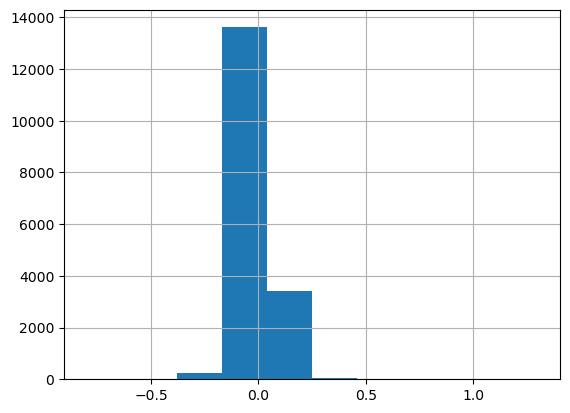

In [61]:
# giá biến động cổ phiếu dự đoán
data2['price_volatility'].hist(bins=10);

<h4> với biến động giá  thực tế là +-0.5% và dự đoán cũng là +-0.5% </h4>
<h4> đến đây chúng ta thấy rằng  mô hình dự đoán là chính sác đới với tập dữ liệu </h4>

### dự đoán 7 ngày tiếp theo

In [62]:
# sử dụng vòng lặp để dự đoán gia 7 ngày tiếp theo dự trên các ngày dự đoán trc 
# mục đích đưa ra để giúp xác định dướng đầu tư
a = 0
data_forecast = scaler_data[-60:]

while a<=7:
    s = data_forecast[-60:]
    price_volatility_forecast = lstm_model.predict(np.reshape(s,(1,60,1)))
    data_forecast1 = np.append(data_forecast, price_volatility_forecast)
    a = a+1

1/1 [==============================] - 0s 42ms/step


In [63]:
# giá dóng cửa dự đoán 7 ngày tiếp theo ( trả về giá trị thực)
data_forecast1 = data_forecast1.reshape(-1, 1)
price_volatility_forecast = scaler.inverse_transform(data_forecast1)
price_volatility_forecast = price_volatility_forecast[-10:]

In [64]:
#tạo index mới 
indexx = data11.index[-1]
lis_index = []
for i in range(0,len(price_volatility_forecast)):
    indexx = indexx +1
    lis_index.append(indexx)


In [65]:
# bảng giá dự đoán tiếp 7 ngày
df_predict =  pd.DataFrame(price_volatility_forecast,
                   columns=['price_volatility_forecast'], index= lis_index)
 
df_predict

price_volatility_forecast
97406                  58.100000
97407                  58.100000
97408                  58.100000
97409                  58.200000
97410                  58.200000
97411                  58.200000
97412                  58.200000
97413                  58.100000
97414                  58.100000
97415                  58.110596

<h2> Dự đoán 7 ngày tiếp chúng ta có thể suy sét và tính thị trg trứng khoán </h2>

In [66]:
# giá biến động cổ phiếu dự đoán của 7 ngày dự đoán
ran1 = df_predict.index[1]
ran2 = ran1+9

price_volatility2 =[]
for i in range(ran1,ran2):
    j = i-1
    ij = (df_predict['price_volatility_forecast'][i] - df_predict['price_volatility_forecast'][j])
    price_volatility2.append(ij)    


data_new12 = df_predict[1:]
data_new12['price_volatility_predict_new'] = price_volatility2

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4664\1696392095.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



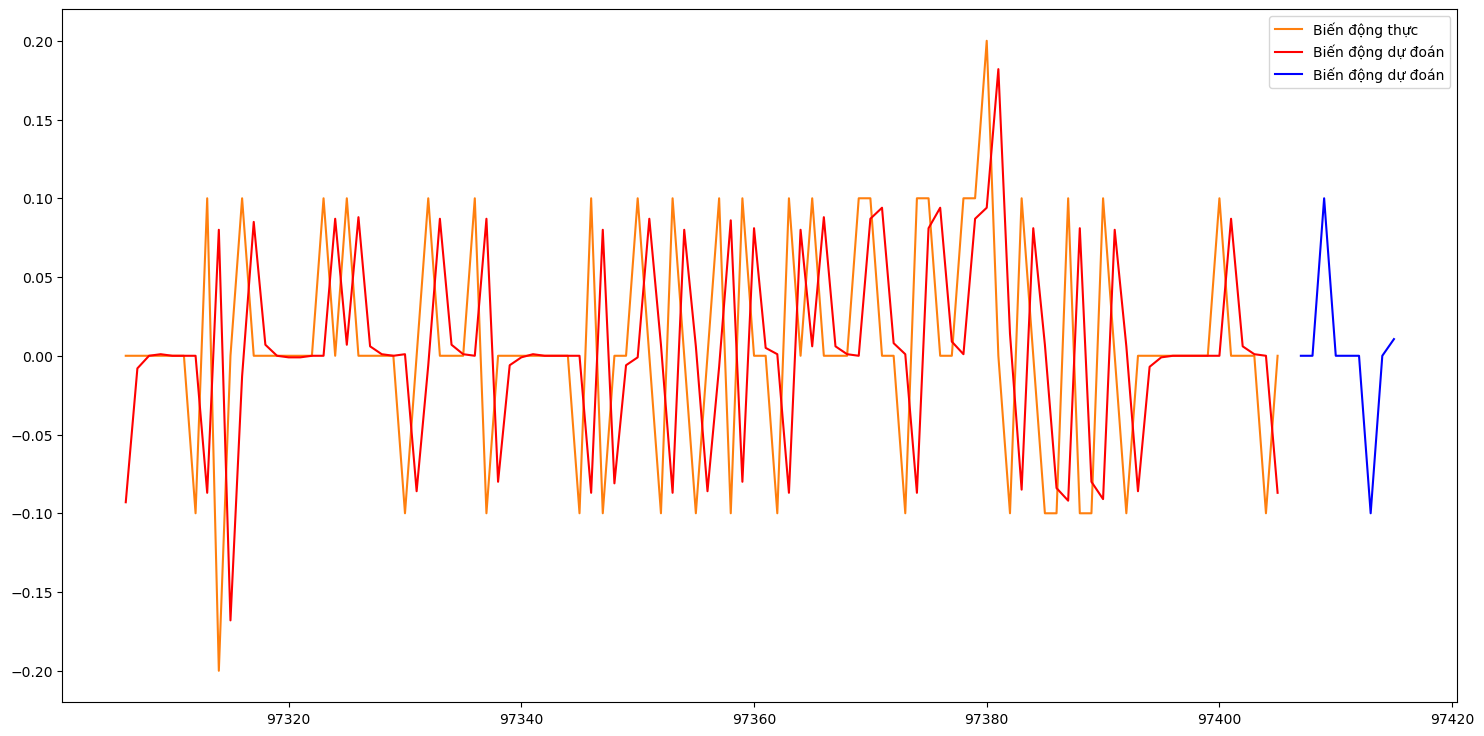

In [67]:
# Biến động giá cổ phiếu fpt thực tế và dự đoán  và dự đoán tiếp 7 ngày
plt.figure(figsize=(18,9))
plt.plot(df_fpt.index[-100:], df_fpt.price_volatility[-100:],color='#ff7f0e', label="Biến động thực")
plt.plot(data11.index[-100:], data2.price_volatility_predict[-100:],color='red', label="Biến động dự đoán")
plt.plot(data_new12.index, data_new12.price_volatility_predict_new,color='blue', label="Biến động dự đoán")
plt.legend()
plt.show()

<p> Tuy vẫn còn sai sót nhưng em mong anh/chị chó thể chiếu cố giúp em ạ  </p>
<p> em cảm ơn anh chị đã đọc bài của em !  </p>
